In [98]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import pandas as pd
import time
import warnings
from astropy.io import fits

time0 = time.perf_counter()

In [99]:
# Fisrt we go to the directory where we have tha data

path = 'C:/Users/povalle/Desktop/MIRI_eng/TempTest/All/' # The repo where you have your .inv files
spec_dir = 'C:/Users/povalle/Desktop/MIRI_eng/'  # The repo where your nav file is stored
navigated_cube = 'jw01022-o023_t001_miri_ch2-short_s3d_nav.fits'
CM = 300
pressure_level = 173  # Slice of the cube

In [100]:
#       The optimal way to reduce is to create three arrays. one for coord x, other for coord y, and other for the
#       data to represent.

os.chdir(path)
k = glob.glob('*.inv')  # Change here to inv when we have the real data
size = int(np.size(k))


# These functions will get the data from the name
def getx(row):
    return int(row[0:2])  # Change these to the correct format of the results in .inv
def gety(column):
    return int(column[3:5])  # Change these to the correct format of the results in .inv

col = np.linspace(0,1,size)
row = np.linspace(0,1,size)
pix = np.linspace(0,1,size)

for i in range(size):
    col[i] = getx(k[i])
    row[i] = gety(k[i])
    
col = col.astype(float).astype(int).astype(str)
row = row.astype(float).astype(int).astype(str)


In [101]:

#Create the x array

for i in range(size):
    if float(col[i])<10:
        col[i] = '0'+str(col[i])

#Create the y array
       
for i in range(size):
    if float(row[i])<10:
        row[i] = '0'+str(row[i])

#Create the data array (changes in this when we have data)
        
for i in range(size):
    df = pd.read_csv(path + col[i] + '-' + row[i] +'-jupiter_ch4_Tapr180.inv', skiprows=1, header=None, sep='\s+')        
    pix[i] = df[1][pressure_level]  # Change to the temperature column (first) and the specific height (second)

col = col.astype(int)
row = row.astype(int)

In [102]:
# Now we create a dataframe with the coords (x and y) for every data.

d = {'col': col, 'row': row, 'bright': pix}
dfx = pd.DataFrame(data=d)

# It creates the frame size for the figure

#maxrow=dfx["row"].max()
#maxcol=dfx["col"].max()

hdux = fits.open(spec_dir + navigated_cube)
maxrow = hdux['SCI'].data.shape[1]
maxcol = hdux['SCI'].data.shape[2]
lat = hdux['LAT_CENT'].data
lon = hdux['LON_EAST'].data
lat = np.radians(lat)
lon = np.radians(lon)
lat[lat == 0] = -np.pi/2 
lon[lon == 0] = np.radians(CM)

arr=np.zeros((maxcol,maxrow))

# Finally create the 2d array with the data (the image of the reducted data)

for index, row in dfx.iterrows():
    i=int(row['row'])
    j=int(row['col'])
    value=row['bright']
    arr[j,i]=value

Runtime of the extraction: 3.1 seconds
Runtime of the extraction: 0.1 minutes
 
Here is the reduced data.


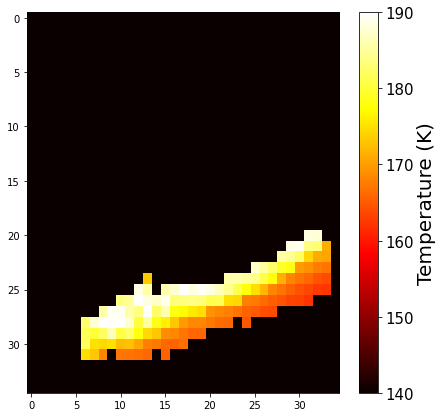

In [103]:
#We plot the image
fig = plt.gcf()
fig.set_size_inches(7,7)


plt.imshow(arr, aspect='auto', cmap='hot', vmin=140,vmax=190)

cbar = plt.colorbar()
cbar.set_label(label='Temperature (K)',fontsize=20)
cbar.ax.tick_params(labelsize=15)


time1 = time.perf_counter()
print(f"Runtime of the extraction: {time1 - time0:0.1f} seconds")
time2=(time1 - time0)/60
print(f"Runtime of the extraction: {time2:0.1f} minutes")
print(' ')
print('Here is the reduced data.')
plt.savefig('C:/Users/povalle/Desktop/tempmap.pdf')

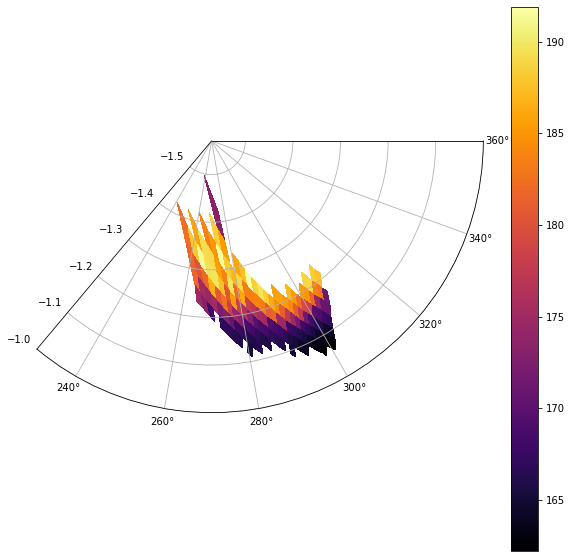

In [104]:
arr[arr == 0] = np.nan

# If you want to smooth the polar plot, change smooth to True.

# ===================================================
lonleft = 230
lonright = 360
smooth = False
# ===================================================

fig = plt.figure()
fig.set_size_inches(10, 10)
r = lat
th = lon
z = arr

plt.subplot(projection="polar")

if smooth == True:
    c = plt.pcolormesh(th, r, z,shading='gouraud', cmap='inferno')
    plt.colorbar(c)
elif smooth == False:
    c = plt.pcolormesh(th, r, z,shading='flat', cmap='inferno')
    plt.colorbar(c)
    
plt.plot(r, th, color='y', ls='None') 

plt.xlim(np.radians(lonleft),np.radians(lonright))
plt.ylim(-np.pi/2,-1)

plt.grid()
plt.show()